In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams

matplotlib.rcParams['font.family']

current_font_list = matplotlib.rcParams['font.family']

font_path = 'C:\\Windows\\Fonts\\batang.ttc'

kfont = matplotlib.font_manager.FontProperties(fname=font_path).get_name()

matplotlib.rcParams['font.family'] = [kfont] + current_font_list


In [85]:
file_path = "./서버호스팅비용_전체내역.xls"

df = pd.read_excel(file_path, engine='xlrd')

# df.columns=['구분','이름','이용요금','위약금','총요금','년','월']

# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      971 non-null    object
 1   이름      903 non-null    object
 2   이용 요금   971 non-null    object
 3   위약금     971 non-null    object
 4   총 요금    971 non-null    object
 5   년       971 non-null    int64 
 6   월       971 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 53.2+ KB


In [86]:
cond1 = (df['구분'] == '합계')

df1 = df[cond1]

total_cost = df1[['총 요금', '년', '월']]

total_cost['날짜'] = total_cost['년'].astype(str) +'년' + total_cost['월'].map("{:02}".format).astype(str) +'월'

total_cost.head()

C:\Users\user\AppData\Local\Temp\ipykernel_23588\1455823435.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_cost['날짜'] = total_cost['년'].astype(str) +'년' + total_cost['월'].map("{:02}".format).astype(str) +'월'


,총 요금,년,월,날짜
6,"346,385 원",18,7,18년07월
13,"389,000 원",18,8,18년08월
20,"389,000 원",18,9,18년09월
27,"389,000 원",18,10,18년10월
35,"390,680 원",18,11,18년11월


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


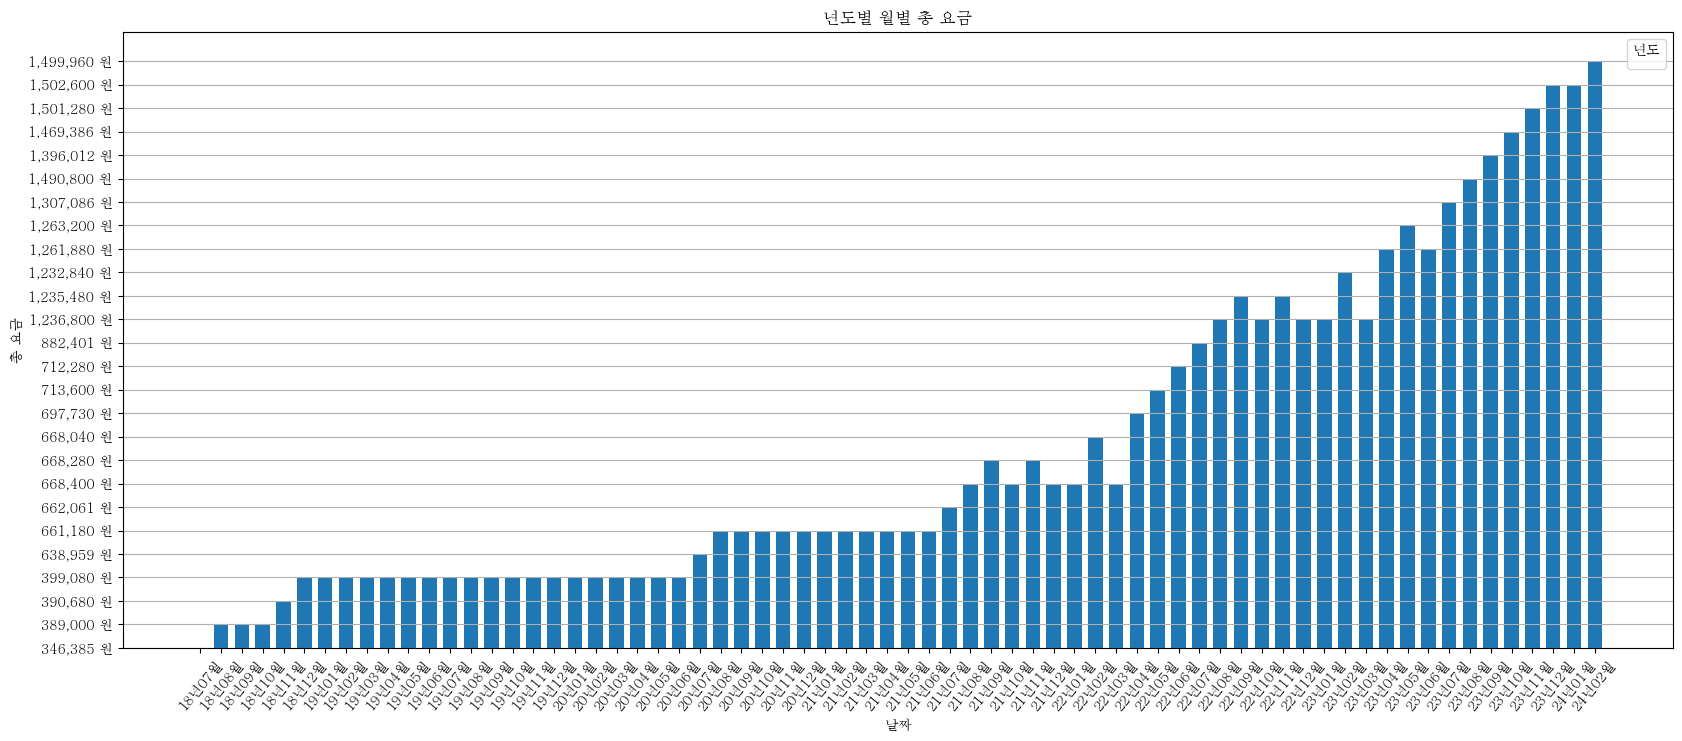

In [103]:
# 총 요금 현황 그래프

bar_width = 0.7

plt.figure(figsize=(20,8))

plt.bar(total_cost['날짜'], total_cost['총 요금'], width=bar_width)

plt.xlabel('날짜')
plt.ylabel('총 요금')
plt.title('기간별 서버 호스팅 비용 추이')
plt.xticks(rotation=50)
plt.legend(title='년도')
plt.grid(axis='y')
# plt.tight_layout()
plt.show()